f:\ptyon\envs\pcore\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
469/469 - 14s - 31ms/step - accuracy: 0.9374 - loss: 0.2068 - val_accuracy: 0.9809 - val_loss: 0.0592
Epoch 2/30
469/469 - 12s - 26ms/step - accuracy: 0.9821 - loss: 0.0560 - val_accuracy: 0.9898 - val_loss: 0.0348
Epoch 3/30
469/469 - 12s - 26ms/step - accuracy: 0.9871 - loss: 0.0398 - val_accuracy: 0.9835 - val_loss: 0.0473
Epoch 4/30
469/469 - 12s - 26ms/step - accuracy: 0.9904 - loss: 0.0290 - val_accuracy: 0.9880 - val_loss: 0.0343
Epoch 5/30
469/469 - 12s - 26ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9896 - val_loss: 0.0318
Epoch 6/30
469/469 - 12s - 26ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9915 - val_loss: 0.0284
Epoch 7/30
469/469 - 13s - 28ms/step - accuracy: 0.9942 - loss: 0.0169 - val_accuracy: 0.9906 - val_loss: 0.0327
Epoch 8/30
469/469 - 13s - 28ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9892 - val_loss: 0.0332
Epoch 9/30
469/469 - 13s - 28ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9934 - 

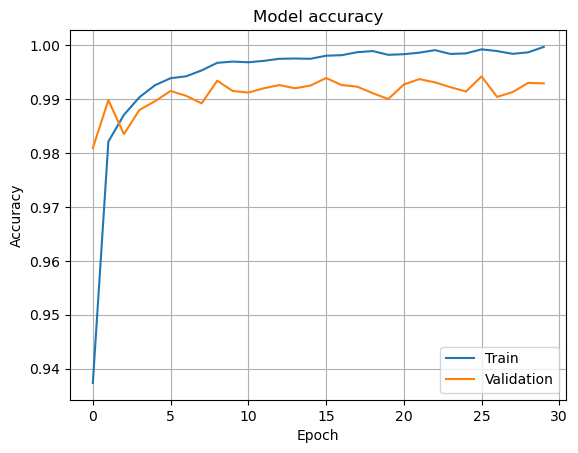

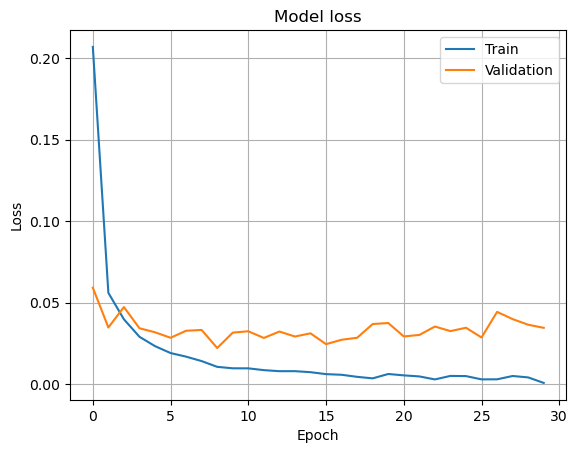

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn=Sequential()
# 필터로 특징을 추출 - 특징 맵
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
#풀링층 - 사소한 변화 무시
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
# 여기까지는 영상처리
#영상을 1차원으로 바꿔주는 레이어
cnn.add(Flatten())
# 특징 학습
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

f:\ptyon\envs\pcore\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
391/391 - 48s - 123ms/step - accuracy: 0.4028 - loss: 1.6321 - val_accuracy: 0.5329 - val_loss: 1.2793
Epoch 2/30
391/391 - 45s - 115ms/step - accuracy: 0.5542 - loss: 1.2373 - val_accuracy: 0.6238 - val_loss: 1.0569
Epoch 3/30
391/391 - 53s - 137ms/step - accuracy: 0.6239 - loss: 1.0670 - val_accuracy: 0.6634 - val_loss: 0.9500
Epoch 4/30
391/391 - 50s - 128ms/step - accuracy: 0.6660 - loss: 0.9502 - val_accuracy: 0.6960 - val_loss: 0.8584
Epoch 5/30
391/391 - 51s - 129ms/step - accuracy: 0.6937 - loss: 0.8716 - val_accuracy: 0.7193 - val_loss: 0.7996
Epoch 6/30
391/391 - 51s - 131ms/step - accuracy: 0.7179 - loss: 0.8040 - val_accuracy: 0.7346 - val_loss: 0.7493
Epoch 7/30
391/391 - 52s - 132ms/step - accuracy: 0.7339 - loss: 0.7587 - val_accuracy: 0.7551 - val_loss: 0.7066
Epoch 8/30
391/391 - 52s - 133ms/step - accuracy: 0.7476 - loss: 0.7169 - val_accuracy: 0.7501 - val_loss: 0.6989
Epoch 9/30
391/391 - 53s - 137ms/step - accuracy: 0.7571 - loss: 0.6890 - val_accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,671,232 (10.19 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,780,822 (6.79 MB)

conv2d_3 (3, 3, 3, 32)
conv2d_4 (3, 3, 32, 32)
conv2d_5 (3, 3, 32, 64)
conv2d_6 (3, 3, 64, 64)


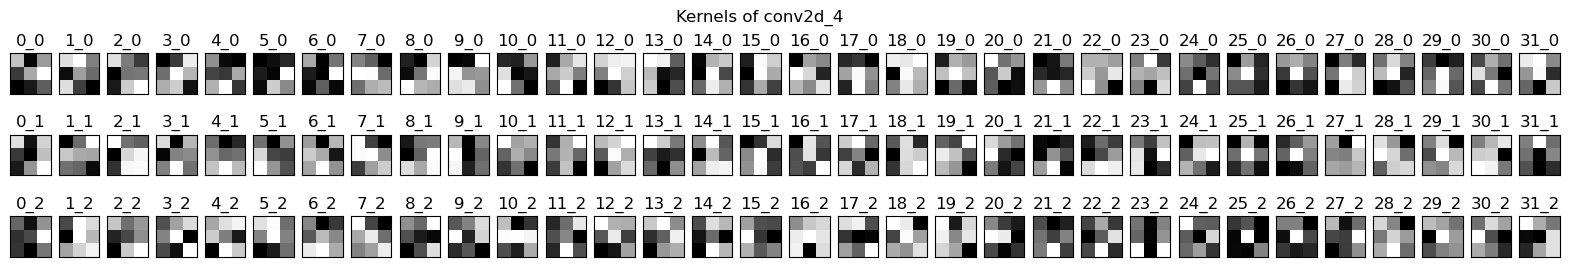

conv2d_3 (None, 30, 30, 32)
conv2d_4 (None, 28, 28, 32)
conv2d_5 (None, 12, 12, 64)
conv2d_6 (None, 10, 10, 64)


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


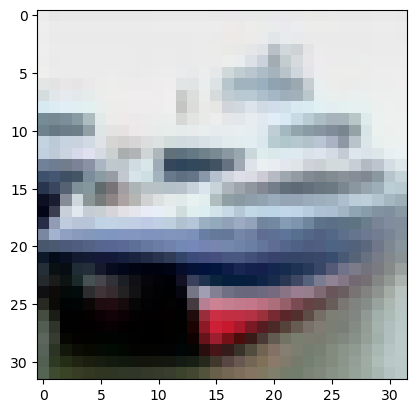

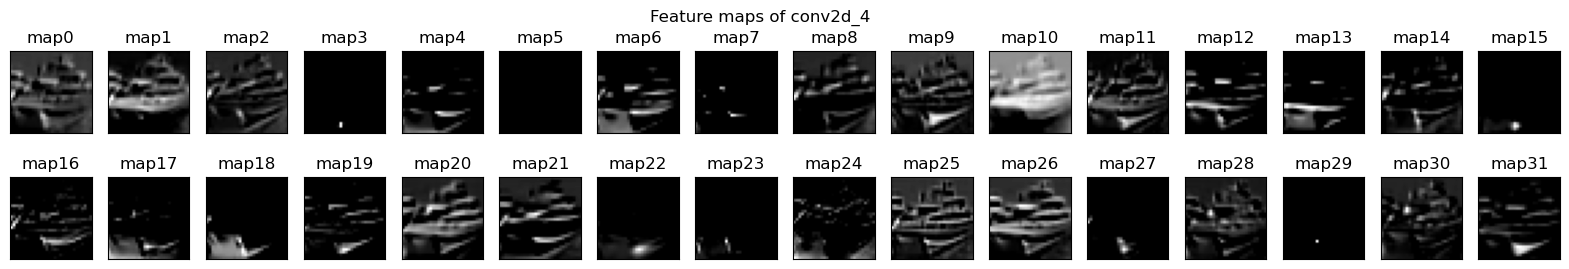

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

cnn.summary() # cnn 모델의 정보 출력

for layer in cnn.layers: # 컨볼루션층의 커널을 시각화
    if 'conv' in layer.name:
        kernel,biases=layer.get_weights()
        print(layer.name,kernel.shape) # 커널의 텐서 모양을 출력

kernel,biases=cnn.layers[0].get_weights() # 층 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel): # i번째 커널
    f=kernel[:,:,:,i]
    for j in range(3): # j번째 채널
        plt.subplot(3,n_kernel,j*n_kernel+i+1)
        plt.imshow(f[:,:,j],cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i)+'_'+str(j))
plt.show()

for layer in cnn.layers: # 컨볼루션층의 특징 맵을 시각화
    if 'conv' in layer.name:
        print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 층 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1]) # 1번 영상을 출력

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32): # i번째 특징 맵
    plt.subplot(2,16,i+1)
    plt.imshow(fm[:,:,i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn_mn=Sequential()
# 필터로 특징을 추출 - 특징 맵
cnn_mn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
# 풀링층 - 사소한 변화 무시
cnn_mn.add(MaxPooling2D(pool_size=(2,2)))
cnn_mn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn_mn.add(MaxPooling2D(pool_size=(2,2)))
cnn_mn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
# 여기까지는 영상 처리
# 영상을 1차원으로 바꿔주는 레이어
cnn_mn.add(Flatten())
# 특징 학습
cnn_mn.add(Dense(84,activation='relu'))
cnn_mn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn_mn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn_mn.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),verbose=2)

f:\ptyon\envs\pcore\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 - 16s - 34ms/step - accuracy: 0.9396 - loss: 0.1985 - val_accuracy: 0.9810 - val_loss: 0.0564
Epoch 2/20
469/469 - 13s - 27ms/step - accuracy: 0.9831 - loss: 0.0545 - val_accuracy: 0.9841 - val_loss: 0.0474
Epoch 3/20
469/469 - 13s - 27ms/step - accuracy: 0.9886 - loss: 0.0363 - val_accuracy: 0.9859 - val_loss: 0.0440
Epoch 4/20
469/469 - 13s - 28ms/step - accuracy: 0.9913 - loss: 0.0283 - val_accuracy: 0.9866 - val_loss: 0.0405
Epoch 5/20
469/469 - 13s - 27ms/step - accuracy: 0.9927 - loss: 0.0219 - val_accuracy: 0.9916 - val_loss: 0.0272
Epoch 6/20
469/469 - 14s - 29ms/step - accuracy: 0.9945 - loss: 0.0169 - val_accuracy: 0.9895 - val_loss: 0.0356
Epoch 7/20
469/469 - 13s - 28ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.9914 - val_loss: 0.0290
Epoch 8/20
469/469 - 14s - 30ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9907 - val_loss: 0.0313
Epoch 9/20
469/469 - 13s - 29ms/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.9918 - 

28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
pred 10 [[4.5945231e-07 1.0522249e-07 2.4074210e-05 9.8287302e-01 1.5182836e-07
  1.3114154e-02 3.1057283e-07 6.1132489e-08 9.2782848e-06 3.9782822e-03]]


<BarContainer object of 10 artists>

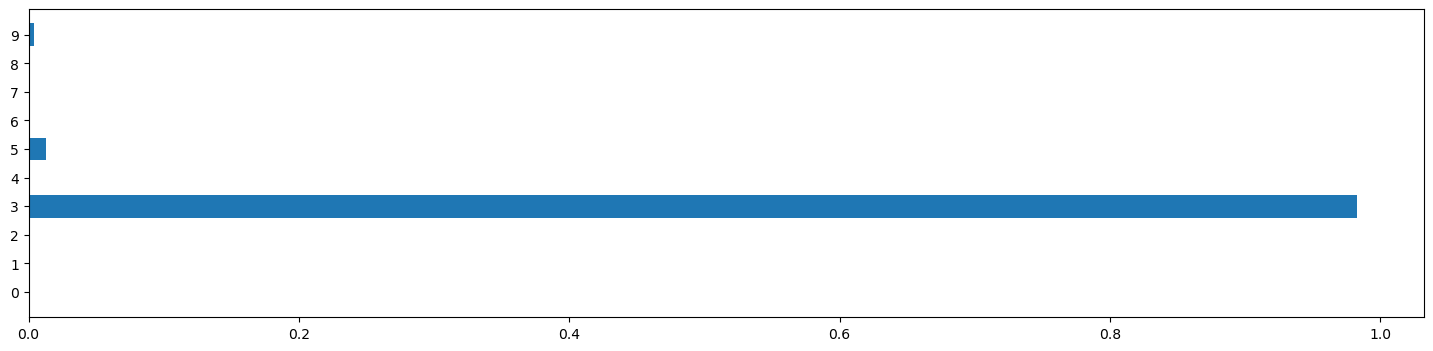

In [2]:
# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# png는 그림판에서 붓으로 숫자 8을 그린 이미지 파일
# png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("data/n5.png").convert("L")
test=[]
x=np.asarray(img.resize([28,28]))/255.0
test.append(x)
print(len(test[0]))

test=np.asarray(test)
# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
pred=cnn_mn.predict(test)

print("pred",len(pred[0]), pred)

import matplotlib.pyplot as plt

n=len(x_test)
plt.figure(figsize=(18,4))
plt.barh(['0','1','2','3','4','5','6','7','8','9'],pred[0])

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

f:\ptyon\envs\pcore\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
391/391 - 53s - 135ms/step - accuracy: 0.4004 - loss: 1.6275 - val_accuracy: 0.5372 - val_loss: 1.2760
Epoch 2/30
391/391 - 45s - 115ms/step - accuracy: 0.5509 - loss: 1.2504 - val_accuracy: 0.6187 - val_loss: 1.0821
Epoch 3/30
391/391 - 48s - 123ms/step - accuracy: 0.6192 - loss: 1.0692 - val_accuracy: 0.6792 - val_loss: 0.9255
Epoch 4/30
391/391 - 49s - 125ms/step - accuracy: 0.6676 - loss: 0.9456 - val_accuracy: 0.6870 - val_loss: 0.8833
Epoch 5/30
391/391 - 50s - 129ms/step - accuracy: 0.6952 - loss: 0.8631 - val_accuracy: 0.7333 - val_loss: 0.7698
Epoch 6/30
391/391 - 51s - 130ms/step - accuracy: 0.7166 - loss: 0.8081 - val_accuracy: 0.7387 - val_loss: 0.7490
Epoch 7/30
391/391 - 52s - 132ms/step - accuracy: 0.7314 - loss: 0.7656 - val_accuracy: 0.7409 - val_loss: 0.7515
Epoch 8/30
391/391 - 52s - 133ms/step - accuracy: 0.7463 - loss: 0.7244 - val_accuracy: 0.7478 - val_loss: 0.7291
Epoch 9/30
391/391 - 51s - 131ms/step - accuracy: 0.7565 - loss: 0.6940 - val_accuracy: 

In [4]:
import numpy as np
import tensorflow as tf
from PIL import Image
import os

class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck'] # CIFAR-10의 부류 이름


x_test=[]
img_orig=[]
fname=[]
for filename in os.listdir('./test_images'): # 폴더에서 테스트 영상 읽기
    if 'jpg' not in filename:
        continue
    img=Image.open('./test_images/'+filename)
    img_orig.append(img)
    fname.append(filename)
    x=np.asarray(img.resize([32,32]))/255.0
    x_test.append(x)
x_test=np.asarray(x_test)

pred=cnn.predict(x_test) # 예측

os.chdir('./test_images')
if not os.path.isdir('class_buckets'):
    os.mkdir('class_buckets')
os.chdir('class_buckets')
for i in range(len(class_names)): # 부류별로 폴더 만들기
    if not os.path.isdir(class_names[i]):
        os.mkdir(class_names[i])

for i in range(len(x_test)): # 인식 결과에 따라 폴더에 저장
    folder_name=class_names[np.argmax(pred[i])]
    os.chdir(folder_name)
    img_orig[i].save(fname[i])
    os.chdir('..')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


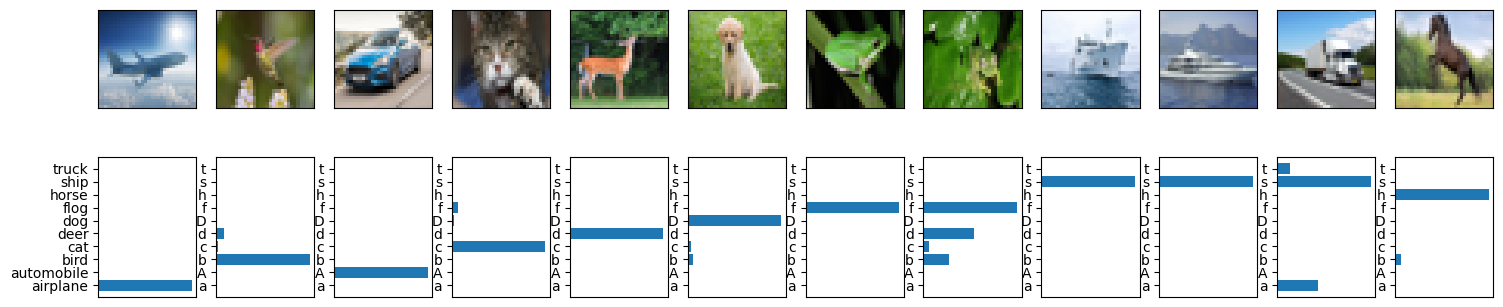

In [5]:
import matplotlib.pyplot as plt

n=len(x_test)
plt.figure(figsize=(18,4))

for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.xticks([]);plt.yticks([])
    plt.subplot(2,n,n+i+1)
    if i==0:
        plt.barh(class_names,pred[i])
    else:
        plt.barh(['a','A','b','c','d','D','f','h','s','t'],pred[i])
    plt.xticks([])